<a href="https://colab.research.google.com/github/JiujiaZ/UncertaintySampling/blob/main/plot_linear_sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import numpy as np
from matplotlib import pyplot as plt

Plot Linear Seperable data results

In [ ]:
!git clone https://github.com/JiujiaZ/UncertaintySampling

Cloning into 'UncertaintySampling'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 67 (delta 15), reused 67 (delta 15), pack-reused 0
Unpacking objects: 100% (67/67), done.


In [ ]:
methods = ['adaptive', 'fixed', 'fixed', 'fixed', 'fixed', 'sgd', 'perceptron']
save_names = ['acc', 'z', 'sigma', 'full_acc']
path = '/content/UncertaintySampling/Linear_Seprable/'
mu = [0, 1, 2, 4, 10, 0, 0]

In [ ]:
save_infos = dict()
for i, method in enumerate(methods):
    for name in save_names:
        load_name = method + '_' + str(mu[i]) + '_' + name
        save_name = method + '_' + name
        save_infos[load_name] = np.load(path + load_name + '.npy')


Text(0, 0.5, 'test accuracy')

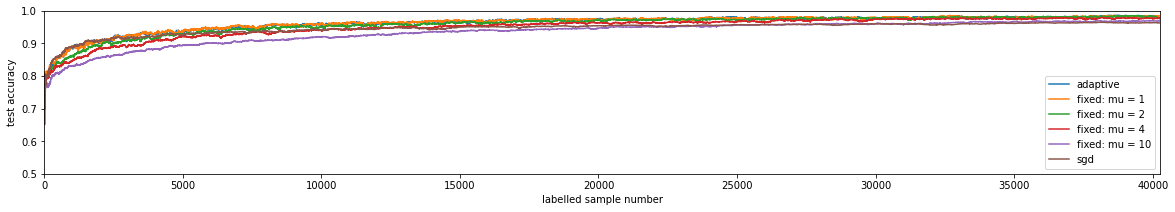

In [ ]:
# plot accuracy on against number of labels used:
plt.rcParams["figure.figsize"] = (20,3)
label_num = list()
for i, method in enumerate(methods[:-1]):
    key = method + '_' + 'acc'
    key = method + '_' + str(mu[i]) + '_' + 'acc'
    acc = save_infos[key]
    label_num.append(len(acc))

    if mu[i] != 0 :
        method = method + ': mu = ' + str(mu[i])
    plt.plot(acc, label = method)

plt.xlim([0, min(label_num)])
plt.ylim([0.5,1])
plt.legend()
plt.xlabel('labelled sample number')
plt.ylabel('test accuracy')


In [ ]:
print(label_num)

[77230, 77180, 63780, 52506, 40258, 200000]


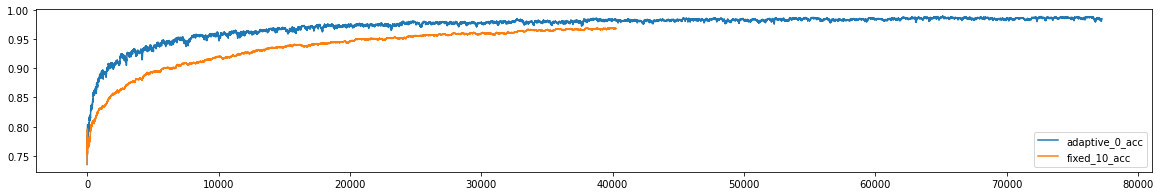

In [ ]:
# view separately

plt.plot(save_infos['adaptive_0_acc'], label = 'adaptive_0_acc')
# plt.plot(save_infos['fixed_1_acc'], label = 'fixed_1_acc')
# plt.plot(save_infos['fixed_2_acc'], label = 'fixed_2_acc')
# plt.plot(save_infos['fixed_4_acc'], label = 'fixed_4_acc')
plt.plot(save_infos['fixed_10_acc'], label = 'fixed_10_acc')
#plt.plot(save_infos['sgd_0_acc'], label = 'sgd_0_acc')

plt.legend()

Text(0, 0.5, 'test accuracy')

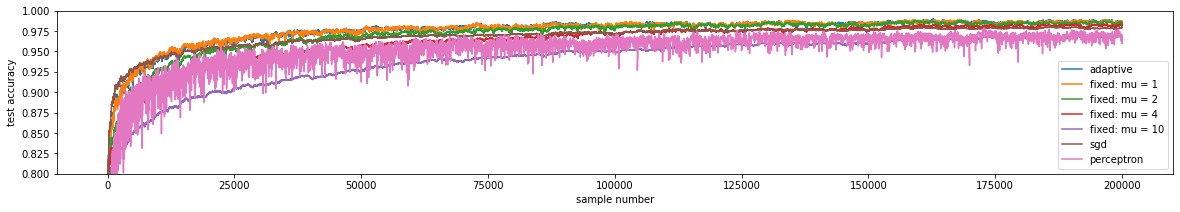

In [ ]:
# plot accuracy on against samples regardless of label being used:
plt.rcParams["figure.figsize"] = (20,3)
for i, method in enumerate(methods):
    key = method + '_' + 'full_acc'
    key = method + '_' + str(mu[i]) + '_' + 'full_acc'
    full_acc = save_infos[key]

    if mu[i] != 0 :
        method = method + ': mu = ' + str(mu[i])
    
    plt.plot(full_acc, label = method)

plt.ylim([0.8,1])
plt.legend()
plt.xlabel('sample number')
plt.ylabel('test accuracy')

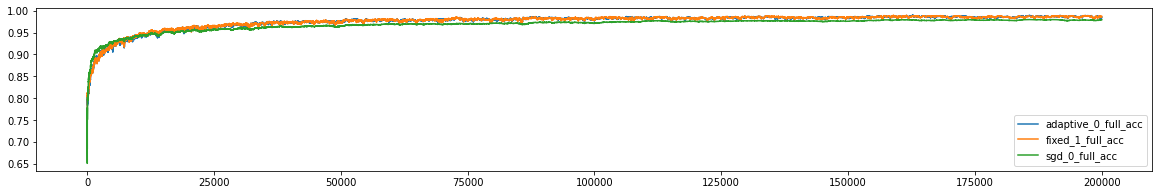

In [ ]:
# view separately

plt.plot(save_infos['adaptive_0_full_acc'], label = 'adaptive_0_full_acc')
plt.plot(save_infos['fixed_1_full_acc'], label = 'fixed_1_full_acc')
# plt.plot(save_infos['fixed_2_full_acc'],  label = 'fixed_2_full_acc')
# plt.plot(save_infos['fixed_4_full_acc'],  label = 'fixed_4_full_acc')
# plt.plot(save_infos['fixed_10_full_acc'],  label = 'fixed_10_full_acc')
plt.plot(save_infos['sgd_0_full_acc'],  label = 'sgd_0_full_acc')
# plt.plot(save_infos['perceptron_0_full_acc'], label = 'perceptron_0_full_acc')

plt.legend()

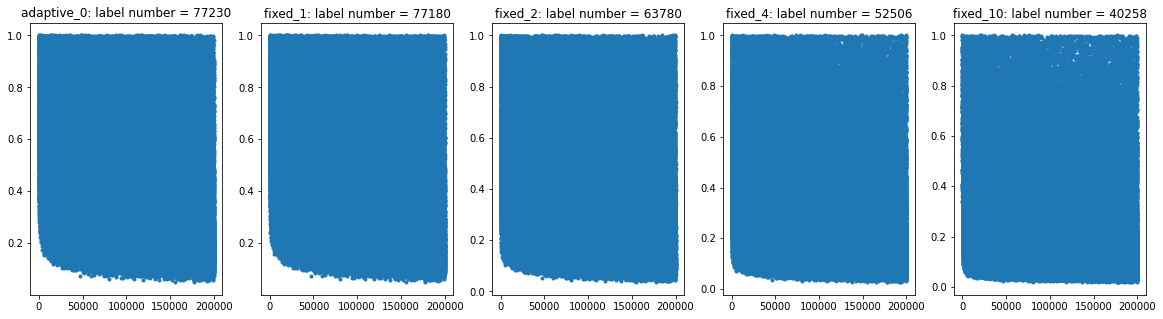

In [24]:
# check sampling dynamic (probability)

fig, axs = plt.subplots(1, 5, figsize=(20,5))
for i, method in enumerate(methods[:-2]):
    key = method + '_' + 'z'
    key = method + '_' + str(mu[i]) + '_' + 'z'
    z = save_infos[key]

    key = method + '_' + 'sigma'
    key = method + '_' + str(mu[i]) + '_' + 'sigma'
    sigma = save_infos[key]
    axs[i].plot(np.arange(len(sigma)), sigma,  '.')

    title = method + '_' + str(mu[i]) + ': label number = ' + str(z.sum())
    axs[i].set_title(title) 
